<a href="https://colab.research.google.com/github/Vallhallax16/A-adidor-de-enlaces/blob/main/EJERCICIOS/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerias y funciones necesarias
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dropout

#Se busca que con este modelo se puedan interpretar las imágenes de prendas de
#ropa contenidas en la clase Fashion MNIST

In [ ]:
#Se carga la base de datos y se separan los sets de entrenamiento y de prueba
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

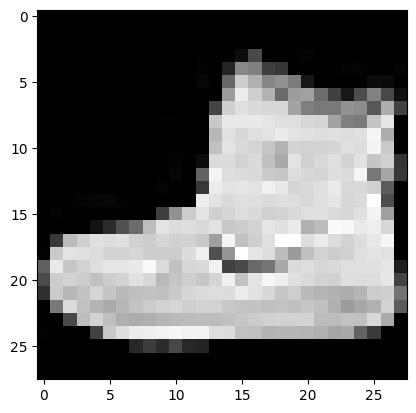

In [ ]:
#Se muestra una de las imagenes contenidas en la base de datos en escalas de grises
plt.imshow(x_train[0], cmap= plt.cm.gray)

In [ ]:
#Se divide entre 255 ya que es la escala de grises
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Ajustar el tamaño de los datoas para incluir el canal de color, aunque solo sea un canal en grises (lo requieren las capas Conv2D)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#El 16 es el número de filtros que se le quiere colocar.
#El strides es un valor que va diciendo como desplazar el kernel.
model = Sequential()
model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)))
#El maxpool divide en cuadrantes y toma el máximo de ese cuadrante
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Convierte la matriz en un vector fila
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=15)

Epoch 1/10
4000/4000 [==============================] - 29s 6ms/step - loss: 0.4897 - accuracy: 0.8315 - val_loss: 0.3758 - val_accuracy: 0.8639
Epoch 2/10
4000/4000 [==============================] - 18s 4ms/step - loss: 0.2918 - accuracy: 0.8932 - val_loss: 0.3051 - val_accuracy: 0.8898
Epoch 3/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.2459 - accuracy: 0.9085 - val_loss: 0.2801 - val_accuracy: 0.8989
Epoch 4/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.2116 - accuracy: 0.9218 - val_loss: 0.2600 - val_accuracy: 0.9059
Epoch 5/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.1856 - accuracy: 0.9318 - val_loss: 0.2490 - val_accuracy: 0.9119
Epoch 6/10
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1620 - accuracy: 0.9392 - val_loss: 0.2642 - val_accuracy: 0.9077
Epoch 7/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.1427 - accuracy: 0.9480 - val_loss: 0.2689 - val_ac

In [ ]:
#Se muestra el resumen del modelo, posteriormente, se muestra el por qué de los datos.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 200)               461000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                        

Summary:

A continuación, se muestra como se obtuvo el número de parámetros del summary.

*   Capa Conv2D
Para el outputshape se obtiene el 24 al tener:

Tamaño de la entrada - (Número de filtros + 1)

(28-5)+1=24

El 24 es el tamaño de la imagen resultante.

Por otro lado, el 16 corresponde al número de filtros.


Para el número de parámetros en esta capa se tienen 16 filtros y como se había determinado cada filtro es de 5x5. Por otro lado, se agrega el bias. El cálculo se realiza de la siguiente manera:

Tamaño de la matriz de la convolución x número de canales x número de filtros + un bias por cada filtro

5 x 5 x 1 x 16 + 16 = 416

*   Max_pooling2D

Para el outputshape, el (None, 12, 12, 16) corresponde a la matriz reducida. Como el pooling sólo reduce el tamaño de la imagen, no hay parámetros a entrenar, por ello el número es 0.

*   Flatten

Para el outputshape, se obtiene de la siguiente manera:

Outputshape = 12 x 12 x 16

Al igual que el pooling, este solo convierte la matriz en vector fila, no hay parámetros a entrenar, por ello el número es 0.
*   Dense

EL número de parámetros se obtiene:

(Número de entradas+ Bias) x Número de neuronas

(2305 + 1) * 200 = 461,000

*   Dense_1

Al igual que en la anterior, el número de parámetros se obtiene:

(Número de entradas+ Bias) x Número de neuronas


(200 + 1) * 100 = 20,100

*   Dense_2

Al igual que en la anterior, el número de parámetros se obtiene:

(Número de entradas+ Bias) x Número de neuronas

(100 + 1) * 50 = 5,050

*   Dense_3

Al igual que en la anterior, el número de parámetros se obtiene:

(Número de entradas+ Bias) x Número de neuronas

(50 + 1) * 10 = 510

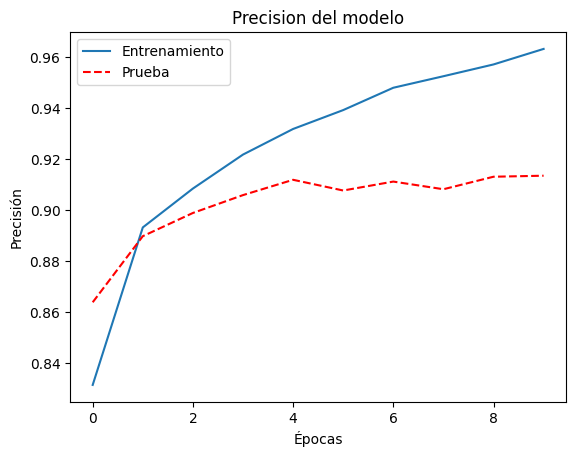

In [ ]:
#Se grafica la precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Precision del modelo')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png',dpi=300)

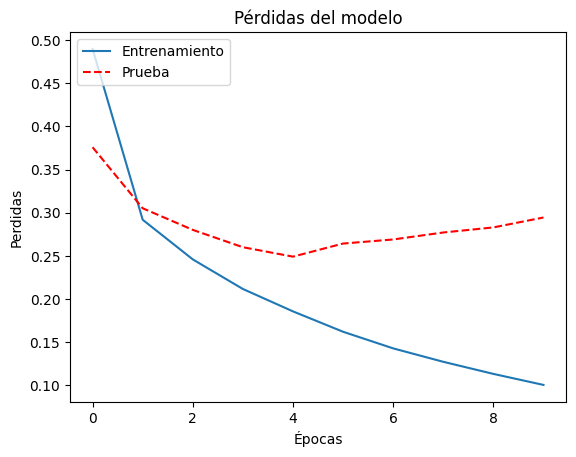

In [ ]:
#Se grafican las pérdidas del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura02.png',dpi=300)

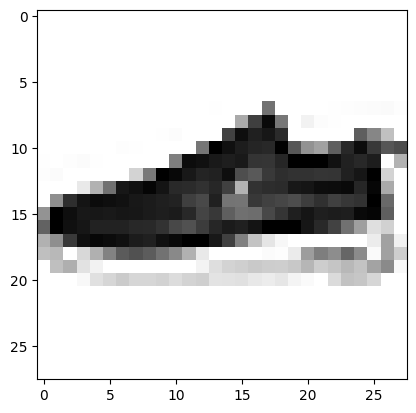

In [ ]:
#Ver imagen de prueba
plt.imshow(x_test[38, :, :, 0], cmap=plt.cm.binary)

In [ ]:
#Predecir con el modelo entrenado, no es entrenar, pasa por la red y dice las predicciones.
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[2.8403716e-05, 1.3070220e-08, 1.1958559e-06, ..., 6.0746934e-05,
        2.5319505e-06, 9.9989295e-01],
       [2.7092337e-04, 7.6096619e-08, 9.9828869e-01, ..., 1.8647150e-07,
        3.5542735e-07, 1.8877829e-07],
       [2.6304857e-05, 9.9995363e-01, 3.5353517e-06, ..., 2.8426140e-07,
        7.0286308e-07, 3.3263348e-08],
       ...,
       [8.1649032e-06, 5.2145828e-07, 6.4336296e-06, ..., 6.9493904e-06,
        9.9994195e-01, 1.7160935e-06],
       [2.4925670e-05, 9.9994457e-01, 5.3346416e-06, ..., 4.1196878e-07,
        8.0980357e-07, 3.8465082e-08],
       [2.4277326e-05, 5.1749799e-07, 5.8249052e-04, ..., 6.8169236e-02,
        2.7715834e-04, 2.6286612e-04]], dtype=float32)

In [ ]:
#Clase con la probabilidad más alta, te da solo la predicción de esa celda
predictions[38]

array([8.6197788e-06, 4.9118167e-09, 3.0772046e-06, 6.2994709e-06,
       6.9268876e-06, 3.3932043e-05, 2.6258107e-07, 9.9972183e-01,
       1.6788121e-06, 2.1736741e-04], dtype=float32)

In [ ]:
#Clase con la probabilidad más alta, en una red es importante saber donde se cometen los errores
np.argmax(predictions[38])

7

In [ ]:
y_test[38]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#Con los pesos sabemos donde está almacenado el aprendizaje de la red
W = model.get_weights()

In [ ]:
model.save('model.keras')

In [ ]:
#Sacamos capas de pesos y observamos como están compuestas, separa en capas diferentes los bias y la capa
weights = model.get_weights()
for i, weight_matrix in enumerate(weights):
  print(f"Capa {i}: {weight_matrix.shape}")

Capa 0: (5, 5, 1, 16)
Capa 1: (16,)
Capa 2: (2304, 200)
Capa 3: (200,)
Capa 4: (200, 100)
Capa 5: (100,)
Capa 6: (100, 50)
Capa 7: (50,)
Capa 8: (50, 10)
Capa 9: (10,)


In [ ]:
#Capturamos los filtros en la primer capa
filtros = W[0].reshape(5, 5, 16)

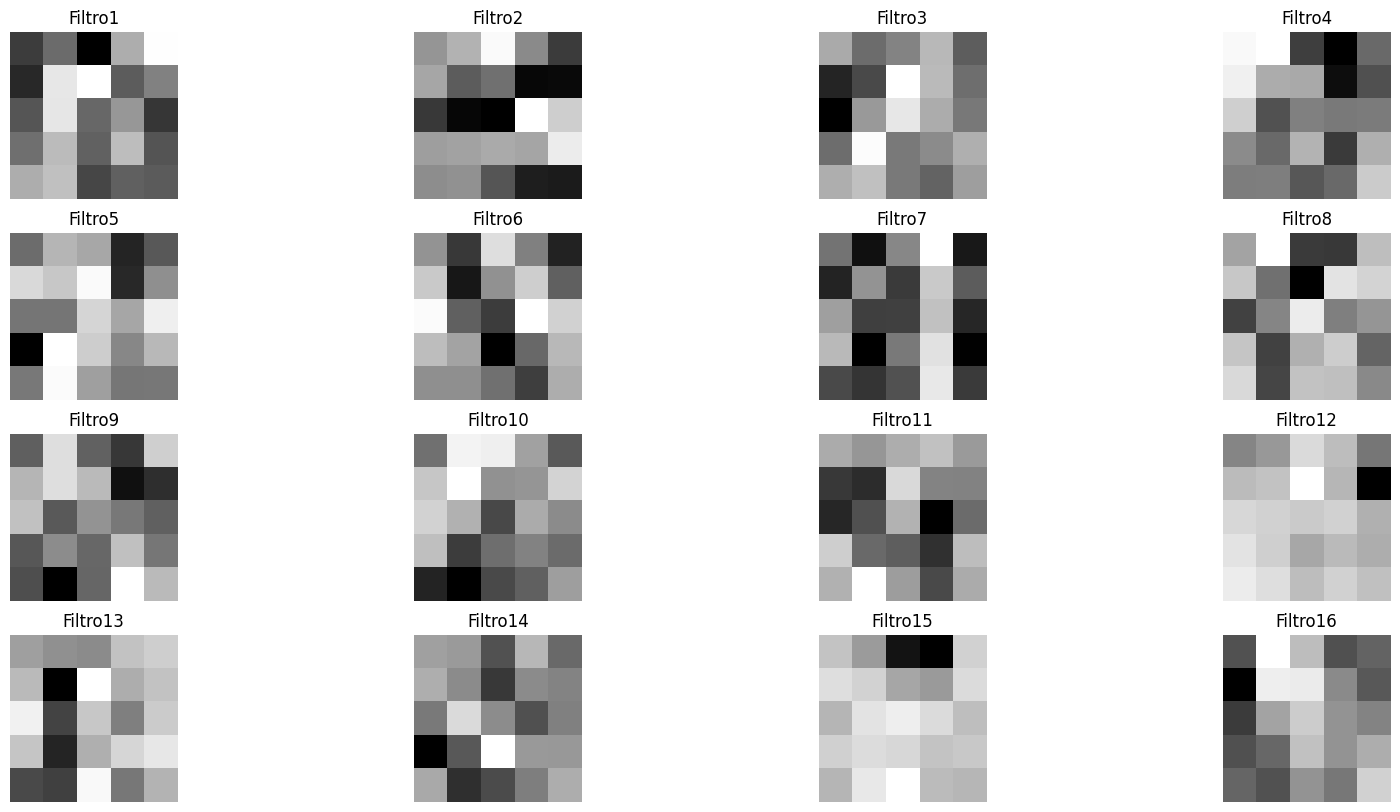

In [ ]:
#plot, las caracteristicas que obtiene el filtro es conocido como extractor de características.
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 10})
for i in range(0, 16):
  plt.subplot(4, 4, i+1)
  plt.imshow(filtros[:,:,i], cmap='gray')
  plt.title('Filtro' + str(i+1))
  plt.axis('off')
plt.show()

In [ ]:
#Construimos una red conteniendo sólo la primer capa
capa1 = Sequential()
capa1.add(model.get_layer('conv2d'))
capa1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
Total params: 416 (1.62 KB)
Trainable params: 416 (1.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Número entre 0 y 9,999 para seleccionar una imagen de prueba
idx = 300

#Aplicar la capa1 a la imagen
filtered_image = capa1.predict(x_test[idx:idx+1])

1/1 [==============================] - 0s 78ms/step


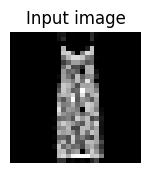

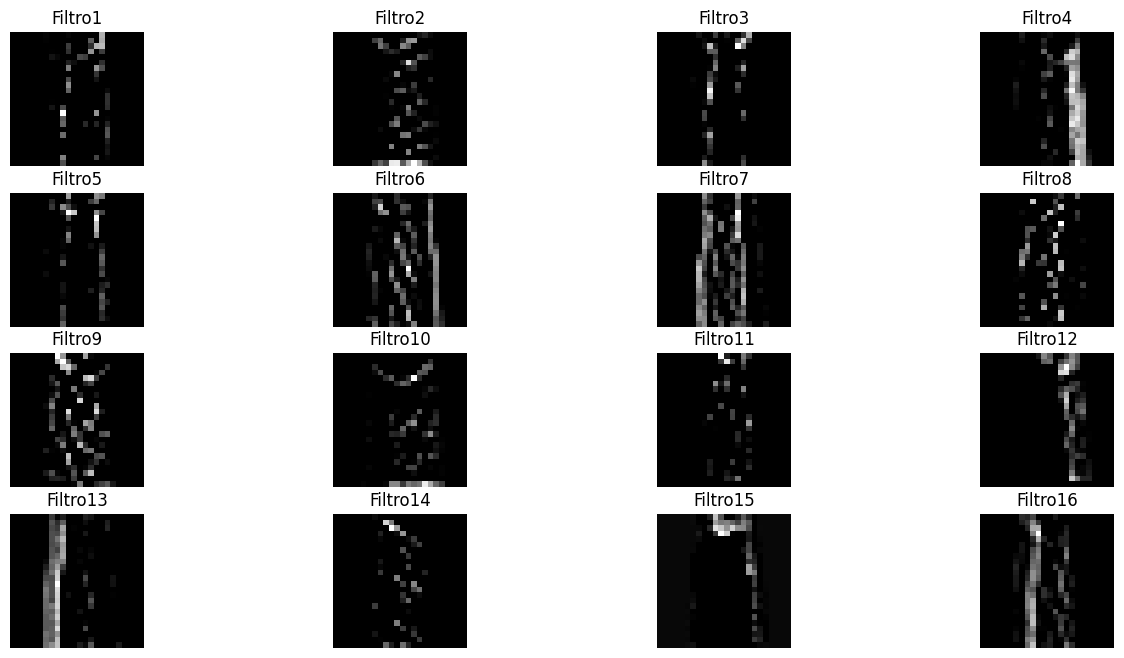

In [ ]:
#plot
plt.figure(figsize=(1.7, 1.7))
plt.rcParams.update({'font.size':10})
plt.imshow(x_test[idx,:,:,0], cmap='gray')
plt.title('Input image')
plt.axis('off')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
for i in range(0, 16):
  plt.subplot(4, 4, i+1)
  plt.imshow(filtered_image[0,:,:,i], cmap='gray')
  plt.title('Filtro'+ str(i+1))
  plt.axis('off')
plt.show()

In [ ]:
#Construimos otra red conteniendo la segunda capa de filtros
capa2 = Sequential()
capa2.add(model.get_layer('conv2d'))
capa2.add(model.get_layer('max_pooling2d'))
capa2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
Total params: 416 (1.62 KB)
Trainable params: 416 (1.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Número entre 0 y 9,999 para seleccionar una imagen de prueba
idx = 300

#Aplicar la capa1 a la imagen
filtered_image2 = capa2.predict(x_test[idx:idx+1])

1/1 [==============================] - 0s 82ms/step


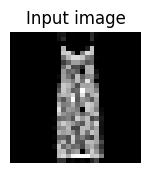

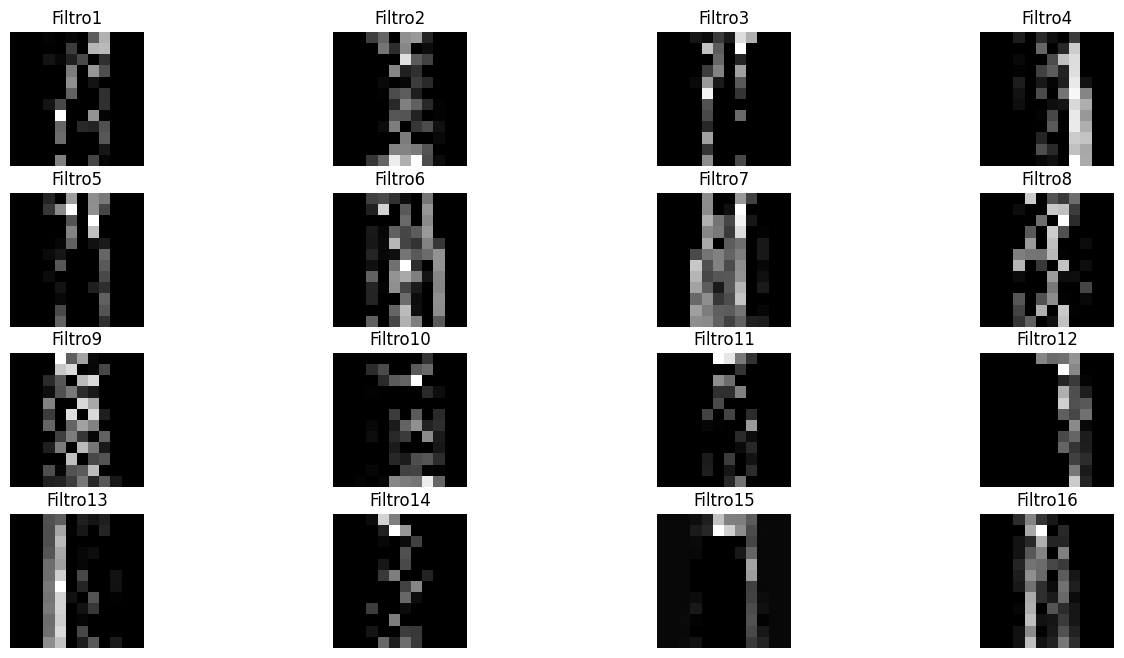

In [ ]:
#plot
plt.figure(figsize=(1.7, 1.7))
plt.rcParams.update({'font.size':10})
plt.imshow(x_test[idx,:,:,0], cmap='gray')
plt.title('Input image')
plt.axis('off')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
for i in range(0, 16):
  plt.subplot(4, 4, i+1)
  plt.imshow(filtered_image2[0,:,:,i], cmap='gray')
  plt.title('Filtro'+ str(i+1))
  plt.axis('off')
plt.show()

In [ ]:
#Se tienen todas las etiquetas de datos para mostrarlas en los reportes de errores
tag_list = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

#Se obtiene el índice del arreglo y_test y se extrae su posición de índice
def Get_real_index(classified_array):
  for i in range(len(classified_array)):
  #
    if(classified_array[i] == 1):
    #
      return i
    #
  #

#Clase para almacenar las listas para su posterior reporte
class Listas_especificas:
  def __init__(self):
  #
    self.lista_0 = []
    self.lista_1 = []
    self.lista_2 = []
    self.lista_3 = []
    self.lista_4 = []
    self.lista_5 = []
    self.lista_6 = []
    self.lista_7 = []
    self.lista_8 = []
    self.lista_9 = []
  #

  def Get_lista(self, opcion):
  #
    if(opcion == 0):
      return self.lista_0

    elif(opcion == 1):
      return self.lista_1

    elif(opcion == 2):
      return self.lista_2

    elif(opcion == 3):
      return self.lista_3

    elif(opcion == 4):
      return self.lista_4

    elif(opcion == 5):
      return self.lista_5

    elif(opcion == 6):
      return self.lista_6

    elif(opcion == 7):
      return self.lista_7

    elif(opcion == 8):
      return self.lista_8

    elif(opcion == 9):
      return self.lista_9
  #

  def Set_lista(self, opcion, valor):
  #
    if(opcion == 0):
      self.lista_0.append(valor)

    elif(opcion == 1):
      self.lista_1.append(valor)

    elif(opcion == 2):
      self.lista_2.append(valor)

    elif(opcion == 3):
      self.lista_3.append(valor)

    elif(opcion == 4):
      self.lista_4.append(valor)

    elif(opcion == 5):
      self.lista_5.append(valor)

    elif(opcion == 6):
      self.lista_6.append(valor)

    elif(opcion == 7):
      self.lista_7.append(valor)

    elif(opcion == 8):
      self.lista_8.append(valor)

    elif(opcion == 9):
      self.lista_9.append(valor)
  #

In [ ]:
lista_errores = []

#Objeto que instancia la clase Listas_específicas
listas_especificas = Listas_especificas()

for i in range(len(predictions)):
#
  index = np.argmax(predictions[i])

  classified_array = y_test[i]
  if(classified_array[index] != 1):
  #
    real_index = Get_real_index(classified_array)
    lista_errores.append(real_index)
    listas_especificas.Set_lista(real_index,f"La imagen {i} fue falsamente reconocida como: {tag_list[index]}")
  #
#

In [ ]:
#Se obtiene la longitud de la lista de errores para poder checar si está bien
len(lista_errores)

In [ ]:
#Se muestra el listado de errores
lista_errores

In [ ]:
for i in range(0,10):
#
  print(f"La red neuronal falló {lista_errores.count(i)} veces al reconocer la imagen {i} ({tag_list[i]})")
#

La red neuronal falló 153 veces al reconocer la imagen 0 (T-shirt/top)
La red neuronal falló 25 veces al reconocer la imagen 1 (Trouser)
La red neuronal falló 130 veces al reconocer la imagen 2 (Pullover)
La red neuronal falló 54 veces al reconocer la imagen 3 (Dress)
La red neuronal falló 163 veces al reconocer la imagen 4 (Coat)
La red neuronal falló 21 veces al reconocer la imagen 5 (Sandal)
La red neuronal falló 234 veces al reconocer la imagen 6 (Shirt)
La red neuronal falló 20 veces al reconocer la imagen 7 (Sneaker)
La red neuronal falló 31 veces al reconocer la imagen 8 (Bag)
La red neuronal falló 34 veces al reconocer la imagen 9 (Ankle boot)


In [ ]:
#Se puede obtener un reporte específico por número, para uno en específico o para todos

for i in range(0,10):
#
  print(f"Mostrando la lista de los que debían ser: {tag_list[i]}")
  lista_temp = listas_especificas.Get_lista(i)

  for k in range(len(lista_temp)):
  #
    print(lista_temp[k])
  #

  print(f"Fin de la lista de los que debían ser: {tag_list[i]}\n")
#

Mostrando la lista de los que debían ser: T-shirt/top
La imagen 27 fue falsamente reconocida como: Shirt
La imagen 374 fue falsamente reconocida como: Shirt
La imagen 381 fue falsamente reconocida como: Shirt
La imagen 410 fue falsamente reconocida como: Shirt
La imagen 452 fue falsamente reconocida como: Shirt
La imagen 454 fue falsamente reconocida como: Pullover
La imagen 547 fue falsamente reconocida como: Shirt
La imagen 674 fue falsamente reconocida como: Shirt
La imagen 736 fue falsamente reconocida como: Shirt
La imagen 881 fue falsamente reconocida como: Shirt
La imagen 890 fue falsamente reconocida como: Dress
La imagen 930 fue falsamente reconocida como: Shirt
La imagen 937 fue falsamente reconocida como: Shirt
La imagen 948 fue falsamente reconocida como: Shirt
La imagen 965 fue falsamente reconocida como: Pullover
La imagen 985 fue falsamente reconocida como: Shirt
La imagen 1000 fue falsamente reconocida como: Shirt
La imagen 1111 fue falsamente reconocida como: Dress
La 

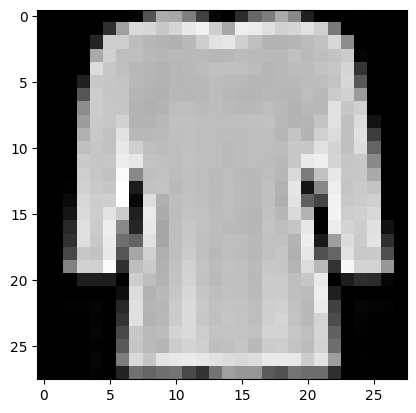

In [ ]:
#Corroboramos la imagen falsamente reconocida
plt.imshow(x_test[155], cmap=plt.cm.gray)

In [ ]:
#predictions[155]
np.argmax(predictions[155])

0

In [ ]:
print(y_test[155])
print(f"El tag correspondiente es: {tag_list[np.argmax(y_test[155])]}")

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
El tag correspondiente es: T-shirt/top


Simple CNN cuenta con una precisión del 93.38%

ResNet18 cuenta con una precisión del 93.17%

StyleNet AI (nosotros) cuenta con una precisión del 91.57%
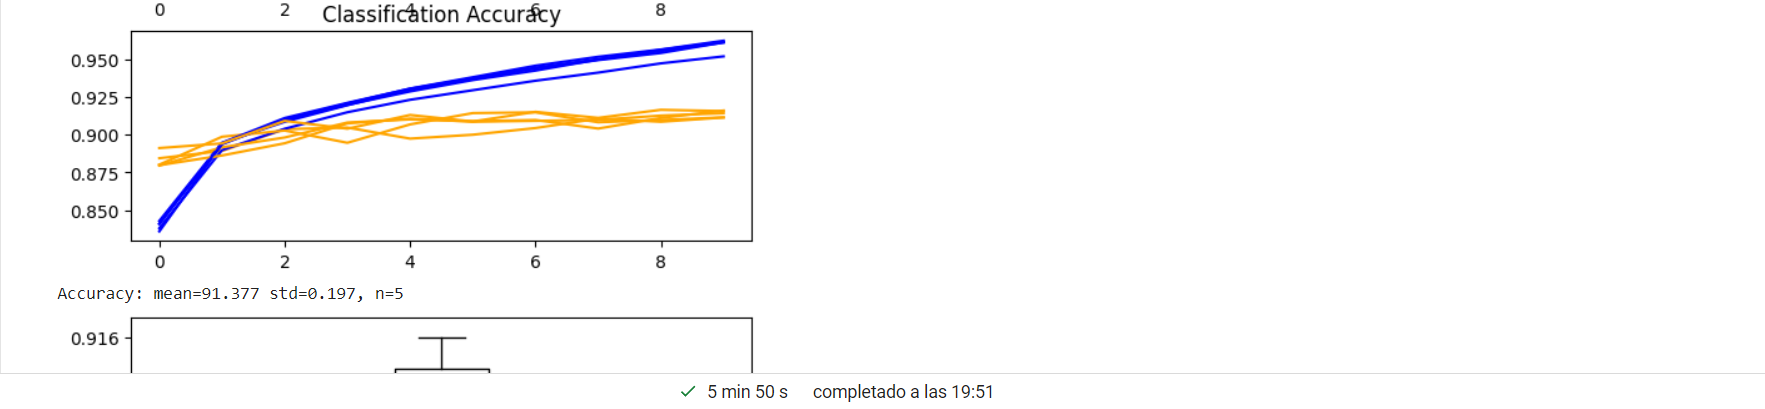

El modelo simple CNN alcanza una precisión de 91.37% - 93.38% tardando 5 minutos con 50 segundos y usando modelos obsoletos de Python